# Lecture 14. Metrics and Model Selection for Classification

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

GitHub for the textbook: https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb

In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/anton-selitskiy/The-Art-of-ML/main/scoring.csv')
#source: https://github.com/nadiinchi/voronovo_seminar_materials/tree/master/base_track/seminars

In [3]:
Data.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             600 non-null    int64  
 1   duration            600 non-null    float64
 2   credit_history      600 non-null    int64  
 3   amount              600 non-null    float64
 4   savings             600 non-null    int64  
 5   employment          600 non-null    int64  
 6   guarantors          600 non-null    int64  
 7   residence           600 non-null    int64  
 8   age                 600 non-null    float64
 9   credits_number      600 non-null    int64  
 10  job                 600 non-null    int64  
 11  maintenance_people  600 non-null    int64  
 12  telephone           600 non-null    int64  
 13  foreign             600 non-null    int64  
 14  real_estate         600 non-null    int64  
 15  life_insurance      600 non-null    int64  
 16  car     

In [5]:
Data['target'].value_counts()

1    300
0    300
Name: target, dtype: int64

Because classes are balanced, we can use accuracy as the mertic.

In [6]:
#Data['target'] = Data['target'].map({0: -1, 1: 1})

In [7]:
X = Data[Data.columns[:-2]] #Don't take into account the text column
y = Data['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [10]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [11]:
y_predict = pipe.predict(X_train_val)
y_predict_proba = pipe.predict_proba(X_train_val)

In [13]:
y_predict_proba[0]

array([0.49627962, 0.50372038])

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [15]:
#y_predict_val = pipe.predict(X_train_val)
accuracy_score(y_train_val, y_predict)

0.7109375

**Task** Create table with features and importance

In [16]:
pipe[-1].coef_[0].tolist()

[0.24328192147842956,
 -0.5026584142378219,
 0.5843317238114637,
 0.11430803830763808,
 0.03150387287272405,
 0.3222720186620226,
 -0.07824337865975228,
 0.0018617794097093145,
 0.13785412436135505,
 -0.2829203526823064,
 -0.10382869960653483,
 -0.08101158110844506,
 0.10849889052026136,
 -0.22803634509373957,
 0.16146501397468224,
 0.05841066938795712,
 0.18775141126690148,
 -0.10221999314209763,
 0.14528012715501037]

In [17]:
pd.DataFrame({'feature': X.columns, 'weight': np.abs(pipe[-1].coef_[0]).tolist()}).sort_values('weight', ascending=False)

,feature,weight
2,credit_history,0.584332
1,duration,0.502658
5,employment,0.322272
9,credits_number,0.282920
0,account,0.243282
13,foreign,0.228036
16,car,0.187751
14,real_estate,0.161465
18,sex,0.145280
8,age,0.137854


Calculate precision and recall for the threshold $th = 0.5$

In [18]:
CM = confusion_matrix(y_train_val, np.sign(y_predict))
CM

array([[133,  57],
       [ 54, 140]])

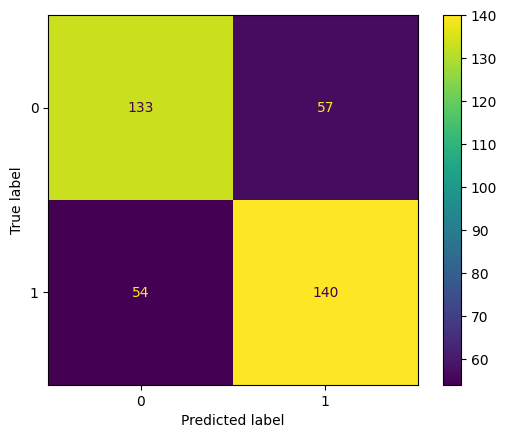

In [19]:
ConfusionMatrixDisplay.from_predictions(y_train_val, y_predict)

In [20]:
recall_score(y_train_val, y_predict), 140/(140+54)

(0.7216494845360825, 0.7216494845360825)

In [21]:
precision_score(y_train_val, np.sign(y_predict)), 140/(140+57)

(0.7106598984771574, 0.7106598984771574)

# Precision - Recall Curve
## Comment: we could do model selection using only accuracy or f1 measure, but my goal is to make you familiar with area under the curve (AUC) measure of quality.

In [22]:
pd.DataFrame({'prediction': y_predict_proba[:6,1], 'target': y_train_val[:6].to_numpy()}).sort_values('prediction', ascending=False)

,prediction,target
4,0.645550,1
5,0.525996,0
0,0.503720,0
3,0.501854,1
1,0.438148,0
2,0.402970,1


**Plot PR and ROC curves**
# True labels
y = [-1, 1, 1, -1, 1, 1]
# Predicted labels
p = [0.5, 0.1, 0.2, 0.9, 0.7, 0.1]

**Write a function to calculate Precision curve**

Manual set of the threshold

In [40]:
def prec(y, y_p):
  alpha = np.linspace(y_p.min(), y_p.max(), num=50)[1:-1]
  a = []
  for th in alpha:
    a.append(precision_score(y, (y_p > th).astype('int')))
  return alpha, np.array(a)

In [39]:
def rec(y, y_p):
  alpha = np.linspace(y_p.min(), y_p.max(), num=50)[1:-1]
  a = []
  for th in alpha:
    a.append(recall_score(y, (y_p > th).astype('int')))
  return alpha, np.array(a)

In [45]:
# def f1(y, y_p):
#   alpha = np.linspace(y_p.min(), y_p.max(), num=50)[1:-1]
#   a = []
#   for th in alpha:
#     a.append(f1_score(y, (y_p > th).astype('int')))
#   return alpha, a

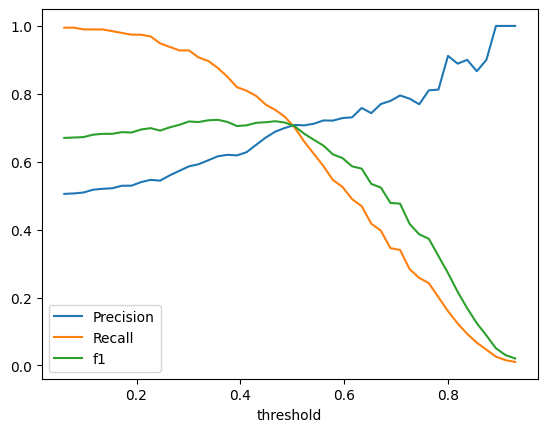

In [60]:
alpha, p = prec(y_train_val, y_predict_proba[:,1])
alpha, r = rec(y_train_val, y_predict_proba[:,1])
f1 = 2*p*r/(p+r) #f1(y_train_val, y_predict_proba[:,1])
plt.plot(alpha, p, label='Precision')
plt.plot(alpha, r, label='Recall')
plt.plot(alpha, f1, label='f1')
plt.xlabel('threshold')
plt.legend()

If we want to maximize both precision and recall, we can use $F$-measure
$$
F_{\beta} = (1+\beta)^2 \frac{precision\times recall}{\beta^2 precision+recall}
$$
\
$$
F_1 =  \frac{2}{\dfrac{1}{precision}+\dfrac{1}{recall}} = 2\frac{precision\times recall}{precision+recall}
$$
**Find maximum f1**

In [61]:
np.argmax(f1)

16

In [62]:
alpha[np.argmax(f1)+1]

0.37503726168259216

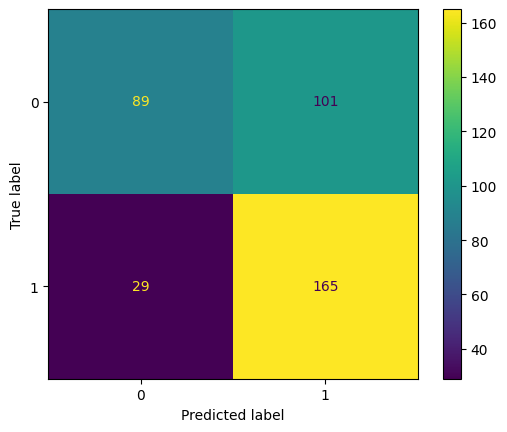

In [64]:
ConfusionMatrixDisplay.from_predictions(y_train_val, (y_predict_proba[:,1] > alpha[np.argmax(f1)+1]).astype('int'))

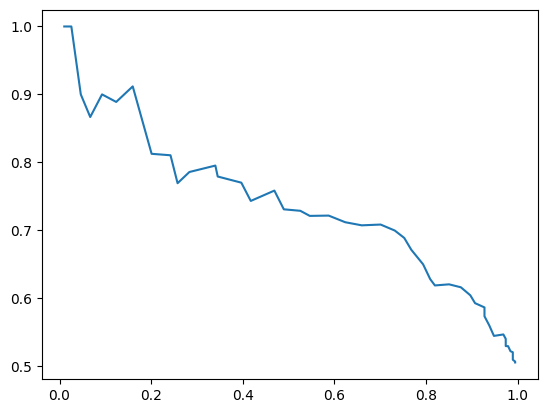

In [53]:
plt.plot(r,p)

In [55]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

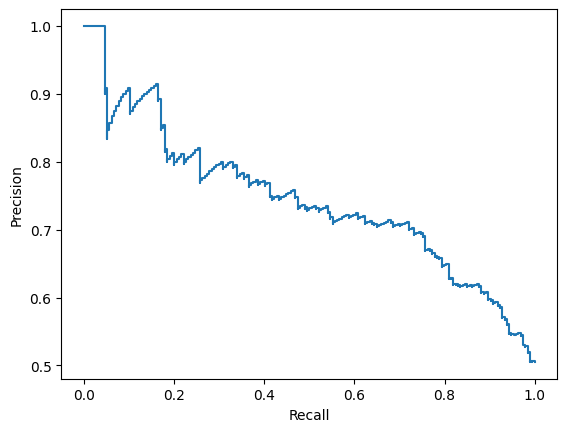

In [66]:
precision, recall, thresh = precision_recall_curve(y_train_val, y_predict_proba[:,1])
f1 =  2 * (precision * recall) / (precision + recall)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

Automated precision-recall plot

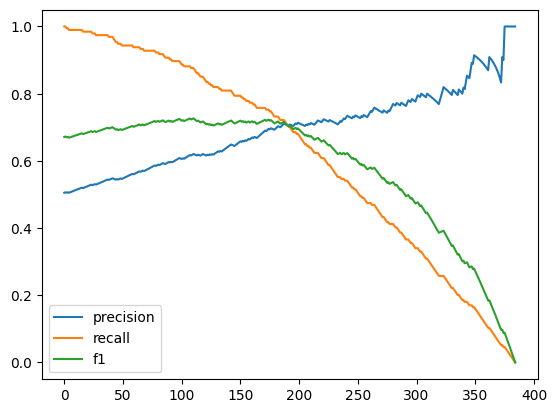

In [67]:
plt.plot(precision, label='precision')
plt.plot(recall, label='recall')
plt.plot(f1, label='f1')
plt.legend()

In [68]:
np.argmax(f1)

110

In [69]:
thresh[np.argmax(f1)]

0.3645803279836792

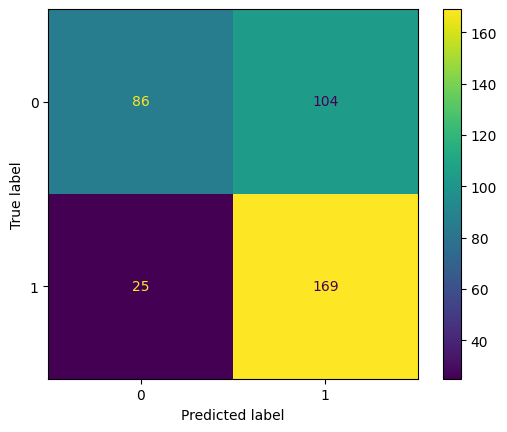

In [70]:
ConfusionMatrixDisplay.from_predictions(y_train_val, (y_predict_proba[:,1] > thresh[np.argmax(f1)]).astype('int'))

# ROC curve


$$
TPR = \frac{TP}{TP+FN}
$$

$$
FPR = \frac{FP}{FP+TN}
$$

In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_val, y_predict)

In [72]:
from sklearn.metrics import RocCurveDisplay

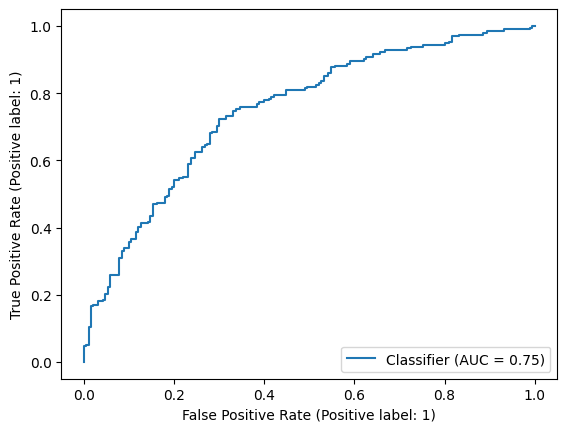

In [75]:
RocCurveDisplay.from_predictions(y_train_val, y_predict_proba[:,1])

Let's try SVM classifier

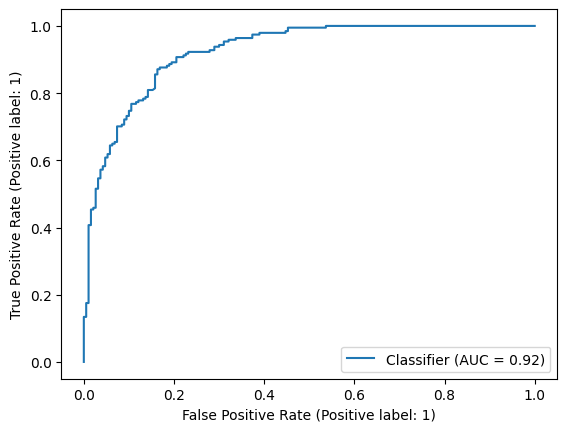

In [76]:
from sklearn.svm import SVC
pipe2 = Pipeline([('scaler', StandardScaler()), ('model', SVC(probability=True))])
pipe2.fit(X_train_val,y_train_val)
y_predict2_proba = pipe2.predict_proba(X_train_val)
RocCurveDisplay.from_predictions(y_train_val, y_predict2_proba[:,-1])

In [77]:
y_val_predict2 = pipe2.predict(X_val)
accuracy_score(y_val, y_val_predict2)

0.6458333333333334

We should prefer the last model. Let's see there performance on the Test:

In [78]:
y_test_predict2 = pipe2.predict(X_test)
accuracy_score(y_test, y_test_predict2)

0.7

# Logistic Regression as Probabilistic Model
Consider the function $\sigma\colon \mathbb{R}\to [0;\ 1]$
$$
\sigma(x) = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}
$$
If we take $\sigma$ of the margin as probability, then maximum likelihood estimation takes form
$$
\prod_{i=1}^{N} \frac{1}{1+e^{-y^{(i)}w^T x^{(i)}}} \to \underset{w}{\max}
$$
It is possible to prove that it is a real probability, i.e., it coinsides with fractions of positive samples in bins.

# Calibration of Models

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
clf_LogReg = make_pipeline(StandardScaler(), LogisticRegression(C=1))
#make_pipeline(StandardScaler(), LinearSVC(C=0.5, max_iter=5000, random_state=0, tol=1e-5))

In [ ]:
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

In [ ]:
clf_list = [
    (clf_LogReg, "Logistic"),
    (clf_SVM, "SVM"),
]

<ipython-input-30-e7ccc67981dd>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Dark2")


Text(0.5, 1.0, 'Calibration plots (Support Vector Machine)')

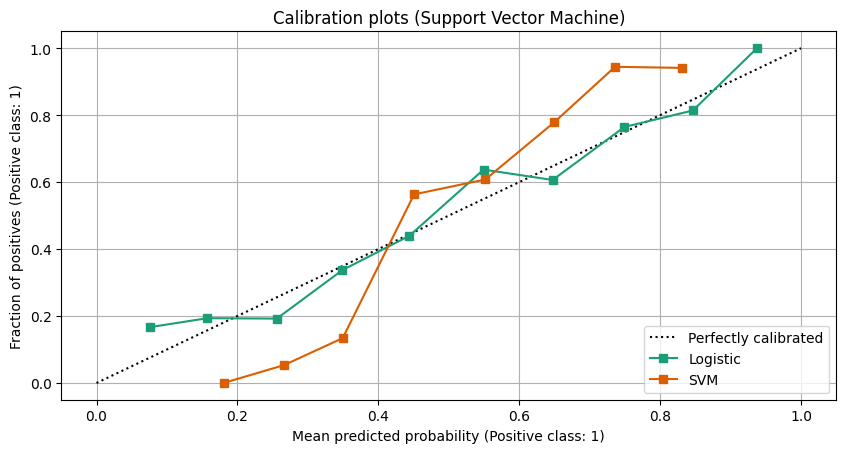

In [ ]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X, y)
    display = CalibrationDisplay.from_estimator(
        clf,
        X,
        y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Support Vector Machine)")